## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
print(df['converted'].value_counts())

converted_true = df['converted'].value_counts()[1]
total_records = df['converted'].shape[0]


proportion = converted_true/total_records
proportion

# The proportion can also be calculated by:
#df['converted'].mean()

0    259241
1     35237
Name: converted, dtype: int64


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Return all records that new_page and treatment don't match
a = df.query("group != 'treatment' & landing_page == 'new_page'").count()
b = df.query("group == 'treatment' & landing_page != 'new_page'").count()

a + b

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Store all records that new_page and treatment don't match
a = df.query("group != 'treatment' & landing_page == 'new_page'")
b = df.query("group == 'treatment' & landing_page != 'new_page'")

# Store all records that old_page and control don't match
c = df.query("group != 'control' & landing_page == 'old_page'")
d = df.query("group == 'control' & landing_page != 'old_page'")

# We now need to remove dataframes a, b, c and d from df1
# This is done using pd.concat, applying drop_duplicates function 
# and setting the flag to keep=False
#
# Source:
# https://stackoverflow.com/questions/37313691/how-to-remove-a-pandas-dataframe-from-another-dataframe
df2 = pd.concat([df, a, b, c, d]).drop_duplicates(keep=False)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(keep = 'first')
df2.duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# This would be the -> number of conversions / Total Outcomes
df2['converted'].mean()

# Alternative calculation...
#df2[df2['converted'] == 1].count() / df2.shape[0]

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# 12.04% chance an individual in the control group has converted
df2.groupby(['group']).mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.618446,0.118807


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# 11.88% chance an individual in the treatment group has converted
df2.groupby(['group']).mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.618446,0.118807


d. What is the probability that an individual received the new page?

In [17]:
# This would be -> No. times an individual received the new page / Total Outcomes
on_new_page = df2[df2['landing_page'] == 'new_page'].shape[0]
total_outcomes = df2.shape[0]

on_new_page / total_outcomes

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Based on the figures calculated, the people in the treatment group have a lower likelihood of converting (at 11.88%) than the people in the control group (at 12%). However, these differences are too narrow to call for a judgement and further investigation is needed.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypothesis, $H_{0}$, states that the new page does not result in an increase in page views when compared with the old page.

$H_{0}$:  $p_{new}$ $\leq$ $p_{old}$

The alternative hypothesis that we want to test, $H_{1}$, states that the new page does result in an increase in page views when compared with the old page.

$H_{1}$:  $p_{new}$ $\gt$ $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# As above, under the null hypothesis it's assumed both p_new and p_old have equal converted success rates

p_new = df2['converted'].mean()
print(p_new)

0.119596675671


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# As above, under the null hypothesis it's assumed both p_new and p_old have equal converted success rates

p_old = df2['converted'].mean()
print(p_old)

0.119596675671


c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2[df2['landing_page'] == 'new_page'].user_id.count()
print(n_new)

145311


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2[df2['landing_page'] == 'old_page'].user_id.count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new, 1 - p_new])
print(new_page_converted)

# Mean outcome of transactions
print(new_page_converted.mean())

[0 1 1 ..., 1 1 1]
0.879300259444


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old, 1 - p_old])
print(old_page_converted)

# Mean outcome of transactions
print(old_page_converted.mean())

[1 1 1 ..., 1 1 1]
0.881444718257


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_difference = new_page_converted.mean() - old_page_converted.mean()
p_difference

-0.0021444588129976294

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
# Run simulation 10,000 times using prior steps
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new, 1 - p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old, 1 - p_old])
    # Append differences to p_diff
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

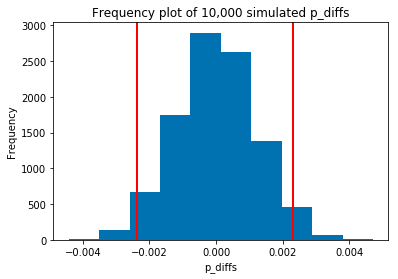

In [26]:
# Set Matplotlib stylesheet
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-colorblind')

# Calculate the lower and upper bound confidence intervals
low, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

# Plot histogram
plt.hist(p_diffs)
plt.axvline(x = low, color = 'r', linewidth = 2)
plt.axvline(x = upper, color = 'r', linewidth = 2)
plt.title("Frequency plot of 10,000 simulated p_diffs")
plt.xlabel("p_diffs")
plt.ylabel("Frequency");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
control_df = df2.query('group == "control"')
treatment_df = df2.query('group == "treatment"')

# Difference observed
difference = treatment_df['converted'].mean() - control_df['converted'].mean()
difference

-0.0015790565976871451

In [28]:
#Lets find the proportion of the p_diffs greater than the actual differences
# Calculate the p-value
(difference < p_diffs).mean()

0.90380000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* The value we just calculated as per scientific studies is known as the p-value. It is the probability of observing the statistic (or one or more extremes in favour of the alternative) if the null hypothesis is true.
* We found the p-value to be 0.9038, with this, we can conclude that the conversion rate difference between the new page as opposed to the old page is not appearing to be significant, thus, we fail to reject the null hypothesis thereby concluding there is not enough evidence suggesting that the new page has a higher conversion rate than the old page. Therefore, we can just stick with the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

print(f"convert_old: {convert_old}")
print(f"convert_new: {convert_new}")
print(f"n_old: {n_old}")
print(f"n_new: {n_new}")

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145311


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
# Compute the z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old,n_new], alternative='smaller', prop_var=False)
print(z_score, p_value)

1.31160753391 0.905173705141


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* The z-score and p-value computed above do agree with the findings in parts j. and k., since the p-value is still large we can accept the null hypothesis, i.e. we fail to reject the null hypothesis and can say that the new page is not any better than the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we're predicting two possible outcomes, either a row has converted or not converted, we're using **Logistic Regression**.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# Let's first add the intercept and the dummy variable columns
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

In [32]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [33]:
# Drop the 'control' column
df2.drop(columns=['control'], inplace=True)

# Rename treatment column to ab_page
df2.rename(columns={'treatment': 'ab_page'}, inplace=True)

In [34]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
import statsmodels.api as sm

# Model the Logistic Regression
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# Fit the model
results = model.fit()

# Show the logistic regression summary
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-19 10:08 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br>
The p-value associated with ab_page is 0.1897. Since it's larger than 0.05 the coefficient is not statistically significant.

In part II of testing, we stated for the alternative hypothesis, that the new page converts more than the old page. However, in part III, the alternative hypothesis here is asking whether there is a difference in conversion rate between the new page and the old page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It's good to consider other features that could have an effect on the conversion rate, one such feature could be whether promotions were put on the new page or not, as this could influence people clicking on the page and potentially even completing a new sales funnel. Another feature could be geography, perhaps the new page is more popular in a certain demographic setting compared to another.

A disadvantage though of having additional features is the increased complexity and the introduction of multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
df_countries.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [39]:
# Merge the dataframes
df3 = df2.merge(df_countries, on="user_id", how = "left")
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [40]:
# Add the dummy variables
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [41]:
model2 = sm.Logit(df3['converted'], df3[['intercept', 'US', 'UK']])

In [42]:
# Fit the model
results2 = model2.fit()

# Show the logistic regression summary
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-19 10:08 AIC:              212781.0880
No. Observations:   290585           BIC:              212812.8269
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3154  0.0000  -2.0101  -1.9833
US           -0.0408    0.0269    -1.5176  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7462  0.4555  -0.0161   0.0360
==================================================================

"""

In [43]:
# Exponentiate the results for interpretation
np.exp(results2.params)

intercept    0.135778
US           0.960024
UK           1.009971
dtype: float64

**Interpreting the above:**

Visitors from the UK are not likely to have an impact on conversion (as there's no unit increase) than users from CA, holding all other variables constant. For the US, the visitors are 0.96x less likely to convert on the new page than users from CA, holding all else constant. It's better to just stick with the old page as there is not much effect on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
# Create interaction variables
df3['US_interaction'] = df3['ab_page'] * df3['US']
df3['UK_interaction'] = df3['ab_page'] * df3['UK']
df3['CA_interaction'] = df3['ab_page'] * df3['CA']

In [45]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA,US_interaction,UK_interaction,CA_interaction
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [46]:
model3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US_interaction', 'UK_interaction','US', 'UK']])

In [47]:
# Fit the model
results3 = model3.fit()

# Show the logistic regression summary
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-19 10:08 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9865   0.0096 -206.3440 0.0000 -2.0053 -1.9676
ab_page          -0.0206   0.0137   -1.5060 0.1321 -0.0474  0.0062
US_interaction   -0.0469   0.0538   -0.8716 0.3834 -0.1523  0.0585
UK_interaction    0.0314   0.0266    1.1811 0.2375 -0.0207  0.0835
US               -0.0175   0.0377   -0.4652 0.6418 -0.0914  0.0563
UK               -0.0057   0.0188   -0.3057 0.7598 -0.0426  0.0311
==================================================================

"""

In [48]:
# Exponentiate the results for interpretation
np.exp(results3.params)

intercept         0.137178
ab_page           0.979636
US_interaction    0.954208
UK_interaction    1.031907
US                0.982625
UK                0.994272
dtype: float64

The p-value is higher than 0.05 for the interaction variables. Hence, the influence of the landing page to convert US visitors is similar to the influence of the landing page to convert visitors in other countries, likewise, the same applies to the visitors from the UK.

## Conclusion
In conclusion, there is not strong enough evidence that the countries (US, UK and CA) have any noticable influence on the conversion rate and nor that the new page results in an increase in the conversion rates. It would be better to either stick with the current old landing page or come up with a new design.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0